In [63]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier


In [64]:
X = np.load('titanic_X_train.npy')
y = np.load('titanic_y_train.npy')

In [65]:
X.shape, y.shape

((889, 27), (889,))

In [66]:
c1 = DecisionTreeClassifier(random_state = 1, max_depth = 4)
c2 = LogisticRegression(random_state = 1)
c3 = GaussianNB()
eclf = VotingClassifier(estimators=[('rf',c1),('lr',c2),('gn',c3)], voting='hard')

In [67]:
from sklearn.model_selection import cross_val_score
cross_val_score(c1, X, y, cv=5).mean()

0.8223068621849807

In [68]:
cross_val_score(c2, X, y, cv=5).mean()

0.8290420872214816

In [69]:
cross_val_score(c3, X, y, cv=5).mean()

0.4600139655938551

In [70]:
cross_val_score(eclf, X, y, cv=5).mean()

0.8222941661905668

In [71]:
eclf1 = VotingClassifier(estimators=[('rf',c1),('lr',c2)], voting='hard')
cross_val_score(eclf1,X,y,cv=5).mean()

0.8301783787215135

하이퍼파라미터 튜닝

In [72]:
c1 = DecisionTreeClassifier(random_state = 1, max_depth = 4)
c2 = LogisticRegression(random_state = 1)
eclf1 = VotingClassifier(estimators=[('dt',c1),('lr',c2)], voting='hard')

In [73]:
'''DecisionTreeClassifier() 의사결정트리 하이퍼파라미터
criterion="gini",
splitter="best",
max_depth=None, 
min_samples_split=2,
min_samples_leaf=1, 
min_weight_fraction_leaf=0, 
max_features=None, 
random_state=None, 
max_leaf_nodes=None, 
min_impurity_decrease=0, 
class_weight=None, ccp_alpha=0'''

'''
LogisticRegression() 로지스틱회귀 하이퍼파라미터
penalty="l2",
*, 
dual=False, 
tol=0.0001, 
C=1, 
fit_intercept=True, 
intercept_scaling=1, 
class_weight=None, 
random_state=None, 
solver="lbfgs", 
max_iter=100, 
multi_class="auto", 
verbose=0, 
warm_start=False, 
n_jobs=None, 
l1_ratio=None
'''

'\nLogisticRegression() 로지스틱회귀 하이퍼파라미터\npenalty="l2",\n*, \ndual=False, \ntol=0.0001, \nC=1, \nfit_intercept=True, \nintercept_scaling=1, \nclass_weight=None, \nrandom_state=None, \nsolver="lbfgs", \nmax_iter=100, \nmulti_class="auto", \nverbose=0, \nwarm_start=False, \nn_jobs=None, \nl1_ratio=None\n'

In [74]:
#투표 분류기 안에 존재하는 모델의 이름__하이퍼파라미터 
pr = {
    'lr__solver': ['liblinear'],
    'lr__C': [0.1,5.0,7.0,10.0,15.0,20.0,100.0],
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [10,8,7,6,5,4,3,2],
    'dt__min_samples_leaf': [1,2,3,4,5,6,7,8,9]
}

In [75]:
from sklearn.model_selection import GridSearchCV
gr = GridSearchCV(eclf1, param_grid=pr, cv = 5)
gr.fit(X,y)
gr.best_score_

KeyboardInterrupt: ignored

In [ ]:
gr.best_params_

In [ ]:
c1 = DecisionTreeClassifier(random_state = 1, criterion='gini', max_depth=10, min_samples_leaf=5)
c2 = LogisticRegression(random_state = 1, C=5.0, solver='liblinear')
end_e = VotingClassifier(estimators=[('dt',c1),('lr',c2)], voting='hard')
cross_val_score(end_e, X, y, cv = 5).mean()

data 로드

In [76]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier


In [77]:
X = np.load('titanic_X_train.npy')
y = np.load('titanic_y_train.npy')

In [78]:
from sklearn.model_selection import cross_val_score
#배깅할 때도 샘플링되는 데이터가 그때그때 다르기 때문에 
eclf = BaggingClassifier(LogisticRegression(random_state=1), oob_score=True, random_state = 1)
cross_val_score(eclf, X, y, cv=5).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWar

0.8267948962102457

In [ ]:
eclf1 = BaggingClassifier(DecisionTreeClassifier(random_state = 1), oob_score=True, random_state=1)
cross_val_score(eclf, X, y, cv=5).mean()

In [ ]:
'''BaggingClassifier() 배깅 하이퍼파라미터
base_estimator=None,
n_estimators=10,
*,
max_samples=1,
max_features=1,
bootstrap=True,
bootstrap_features=False,
oob_score=False, 
warm_start=False,
n_jobs=None, 
random_state=None,
verbose=0'''

In [ ]:
pr = {
    'n_estimators':[10,20,30,40,50,55],
    'max_samples':[0.5,0.6,0.7,0.8,0.9,1],
}
from sklearn.model_selection import GridSearchCV
gr = GridSearchCV(eclf, pr, cv=5)
gr.fit(X,y)
gr.best_score_

In [ ]:
gr.best_params_

In [ ]:
gr.best_estimator_.predict(X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
en = RandomForestClassifier(n_estimators=10, max_features=2, oob_score=True)
cross_val_score(en, X, y, cv = 5).mean()

In [ ]:
pr = {
    'n_estimators':[10,20,30,40,50,55],
    'max_features':[1,2,3,4,5,6,10,15,len(X[0])],
}

gr = GridSearchCV(en, pr, cv = 5)
gr.fit(X,y)
gr.best_score_

In [ ]:
gr.best_params_

In [ ]:
gr.best_estimator_.oob_score_

부스팅

In [79]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
X = np.load('titanic_X_train.npy')
y = np.load('titanic_y_train.npy')


In [84]:
from sklearn.ensemble import AdaBoostClassifier
ecf = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=500)

In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(ecf, X, y, cv = 5).mean()

0.8065511331175014

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
cross_val_score(rf, X, y, cv = 5).mean()

0.8020694470894434

In [83]:
"""AdaBoostClassifier()
base_estimator=None, 
*, 
n_estimators=50, 
learning_rate=1,
algorithm="SAMME.R", 
random_state=None"""

0.8148148148148148

In [ ]:
pr = {
    'n_estimators':[10],
    'base_estimator__max_depth': [2]
}

에이다부스트 의사결정트리(깊이: 2)

In [94]:
X.shape

(889, 27)

In [90]:
ecf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=1000)
cross_val_score(ecf, X, y, cv = 5).mean()

0.7829429315051101

In [91]:
ecf.fit(X,y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=1000)

In [95]:
len(ecf.feature_importances_)

27

랜덤포레스트 (깊이 2)

In [96]:
rf = RandomForestClassifier(max_depth=2, n_estimators=1000, oob_score=True)
cross_val_score(rf, X, y, cv = 5).mean()

0.7840284390274868

In [97]:
rf.fit(X,y)

RandomForestClassifier(max_depth=2, n_estimators=1000, oob_score=True)

In [98]:
rf.oob_score_

0.7919010123734533

랜덤포레스트


In [105]:
rf = RandomForestClassifier(random_state=42)
cross_val_score(rf, X, y, cv = 5).mean()

0.7953342220529422

그라디언트 부스팅

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier(learning_rate = 0.2, n_estimators=500, random_state=42) #학습률, 모델의 개수 설정 가능
cross_val_score(gdb,X,y,cv=5).mean()

0.8144226496540341

In [101]:

gdb = GradientBoostingClassifier(random_state=42) #학습률, 모델의 개수 설정 가능
#학습률이 높으면 피쳐를 잘 기억함.
#
cross_val_score(gdb,X,y,cv=5).mean()

0.8245730971878371

히스토그램 부스팅

In [102]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgd = HistGradientBoostingClassifier(random_state=42)
cross_val_score(hgd,X,y,cv=5).mean()

0.8357963562496031

엑스트라트리

In [104]:
from sklearn.ensemble import ExtraTreesClassifier #샘플링데이터 중복불가?
et = ExtraTreesClassifier(random_state = 42)
cross_val_score(et,X,y,cv=5).mean()

0.8065638291119152

XGBoost

In [106]:
from xgboost import XGBClassifier
xg = XGBClassifier(tree_method='hist', random_state=42)
cross_val_score(xg, X, y, cv = 5).mean()

0.8268012442074525

LightGBM

In [107]:
from lightgbm import LGBMClassifier
lg = LGBMClassifier(random_state = 42)
cross_val_score(lg, X, y, cv = 5).mean()

0.831321018218752

In [110]:
import numpy as np


비지도

군집

In [114]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2022-07-18 07:40:15--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2022-07-18 07:40:15--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2022-07-18 07:40:16--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [115]:
import numpy as np
import matplotlib.pyplot as plt


In [137]:
f=np.load('fruits_300.npy')

In [118]:
f.shape

(300, 100, 100)

In [119]:
f[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

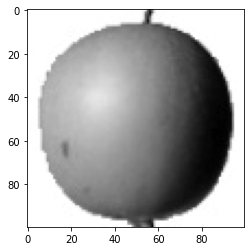

In [121]:
plt.imshow(f[0], cmap='gray_r')

In [123]:
apple = f[0:100].reshape(-1,100*100)
pineapple = f[100:200].reshape(-1,100*100)
banana = f[200:].reshape(-1,100*100)

In [124]:
apple.shape

(100, 10000)

In [127]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

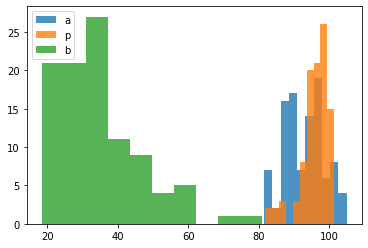

In [128]:
plt.hist(apple.mean(axis=1), alpha=0.8)
plt.hist(pineapple.mean(axis=1), alpha=0.8)
plt.hist(banana.mean(axis=1),alpha=0.8)
plt.legend(['a','p','b'])
plt.show()

In [129]:
a_m = apple.mean(axis=0).reshape(100,100)
p_m = pineapple.mean(axis=0).reshape(100,100)
b_m = banana.mean(axis=0).reshape(100,100)

In [ ]:
plt.imshow(a_m, cmap = 'gray_r')

In [ ]:
plt.imshow(p_m, cmap = 'gray_r')

In [ ]:
plt.imshow(b_m, cmap = 'gray_r')

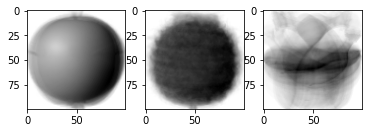

In [138]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(a_m, cmap = 'gray_r')
ax[1].imshow(p_m, cmap = 'gray_r')
ax[2].imshow(b_m, cmap = 'gray_r')
plt.show()

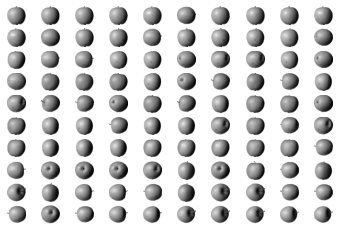

In [141]:
# 사진 당 평균값과의 차이 평균
a_d_l = np.abs(f-a_m)
a_d_l_m = np.mean(a_d_l,axis=(1,2))
a_i = np.argsort(a_d_l_m)[:100]
fg, ax = plt.subplots(10,10)
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(f[a_i[i*10+j]], cmap='gray_r')
        ax[i,j].axis('off')
plt.show()

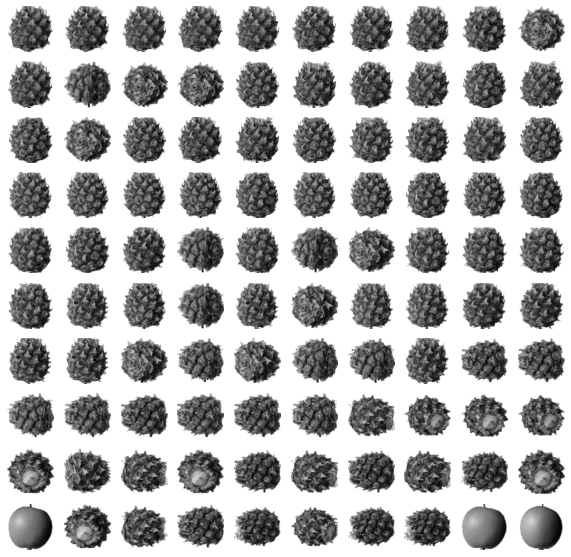

In [143]:
p_d_l = np.abs(f-p_m)
p_d_l_m = np.mean(p_d_l,axis=(1,2))
a_i = np.argsort(p_d_l_m)[:100]
fg, ax = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(f[a_i[i*10+j]], cmap='gray_r')
        ax[i,j].axis('off')
plt.show()

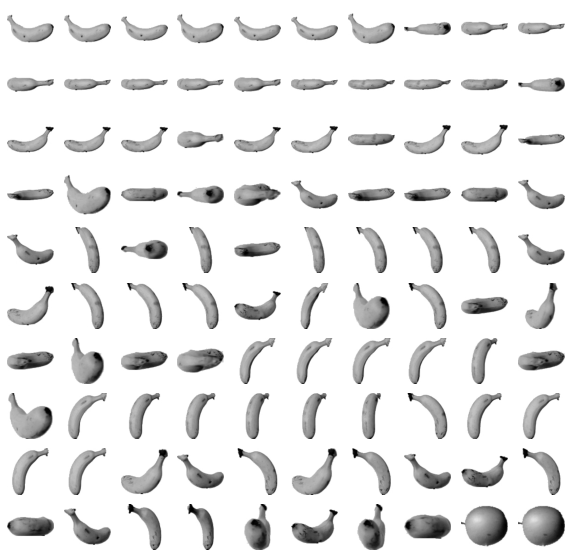

In [144]:
p_d_l = np.abs(f-b_m)
p_d_l_m = np.mean(p_d_l,axis=(1,2))
a_i = np.argsort(p_d_l_m)[:100]
fg, ax = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(f[a_i[i*10+j]], cmap='gray_r')
        ax[i,j].axis('off')
plt.show()

K-Means

In [146]:
f_2d = f.reshape(-1,100*100)

In [147]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state = 42)
km.fit(f_2d)

KMeans(n_clusters=3, random_state=42)

학습을 통해 정답을 만들어 낸다.

In [149]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

In [154]:
len(f[km.labels_ == 0])

111

In [155]:

def d_f(arr, ratio = 1):
    n=len(arr)  #입력으로 받은 데이터 개수만큼만 그리기
    rows = int(np.ceil(n/10)) #전체 데이터 개수 / 10 이걸 올림해서 int화. 즉 가로줄 개수.
    cols = n if rows < 2 else 10  #2줄 이상이면 n개, 1줄밖에 안나오면 걍 1개
    fg, ax = plt.subplots(rows,cols, figsize=(cols*ratio, rows*ratio),squeeze=False)
    for i in range(rows): 
        for j in range(cols):
            if i * 10 + j < n:
                ax[i,j].imshow(arr[i*10+j], cmap='gray_r')
            ax[i,j].axis('off')
    plt.show()

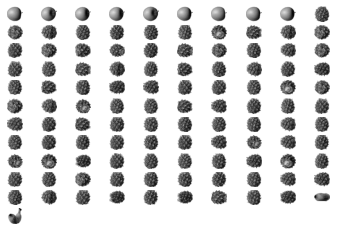

In [151]:
d_f(f[km.labels_ == 0])

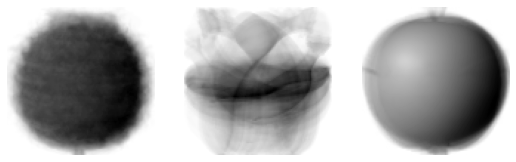

In [156]:
d_f(km.cluster_centers_.reshape(-1,100,100), ratio = 3)

In [159]:
km.cluster_centers_.shape

(3, 10000)

In [161]:
km.transform(f_2d[:1])
#0, 1, 2 중 2가 가장 작다(가장 가깝다)

array([[4677.10527943, 8642.61845541, 3087.33092099]])

In [162]:
km.predict(f_2d[:1])

array([2], dtype=int32)

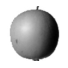

In [163]:
d_f(f[:1])

In [164]:
km.n_iter_

4

최적의 k

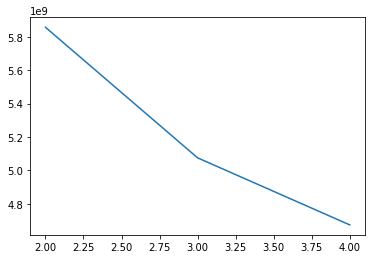

In [166]:
ck = []
for i in range(2,5):
    km=KMeans(n_clusters=i, random_state = 42)
    km.fit(f_2d)
    ck.append(km.inertia_)
plt.plot(range(2,5),ck)
plt.show()

In [170]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state = 42)
km.fit(f_2d)

KMeans(n_clusters=3, random_state=42)

In [173]:
km.predict(f_2d[:1])

array([2], dtype=int32)

In [176]:
end_data = np.array(['pineapple', 'banana', 'apple'])

In [177]:
end_data[km.predict(f_2d[:1])]

array(['apple'], dtype='<U9')